In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA

## Load the data

In [4]:
# Load DataFrames
sound_fet_1 = pd.read_csv("/home/harald_stabbetorp/Master/e-prop_master_nmbu/sound_fet/one_encoded_features.csv")
sound_fet_2 = pd.read_csv("/home/harald_stabbetorp/Master/e-prop_master_nmbu/sound_fet/two_encoded_features.csv")
silence = pd.read_csv("/home/harald_stabbetorp/Master/e-prop_master_nmbu/sound_fet/zeros.csv")

## Do PCA with mixed data

In [5]:
list_data = [sound_fet_1, sound_fet_2, silence, sound_fet_1, sound_fet_2, 
             sound_fet_2, silence, silence, silence, sound_fet_1]
list_data_combined = pd.DataFrame(np.vstack(list_data))

pca = PCA(n_components=12)
list_data_pca = pca.fit_transform(list_data_combined).T

## Explained variance

Text(0.5, 0, 'Number of Components')

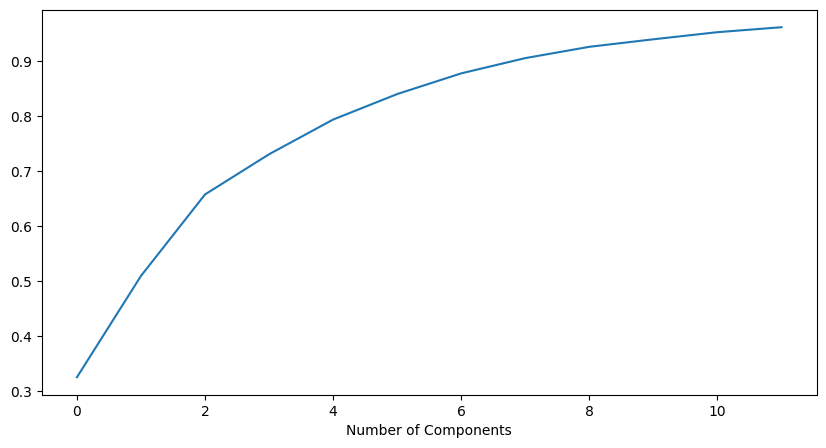

In [6]:
# plot the pca componets compared to explained variance
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')

## Score plot

/tmp/ipykernel_794341/3413507766.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(list_data_pca[0], list_data_pca[1], cmap='viridis')


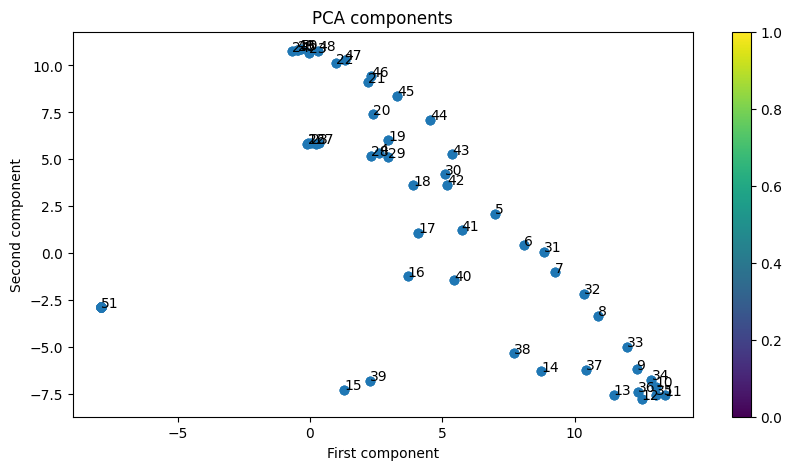

In [12]:
# make a score plot for the 8 first componetes, color change based on the sequence
plt.figure(figsize=(10, 5))
plt.scatter(list_data_pca[0], list_data_pca[1], cmap='viridis')
# number the points according to the sequence
for i, txt in enumerate(range(1, 52)):
    plt.annotate(txt, (list_data_pca[0][i], list_data_pca[1][i]))

plt.xlabel('First component')
plt.ylabel('Second component')
plt.title('PCA components')
plt.colorbar()
plt.show()

## Score plot at given t

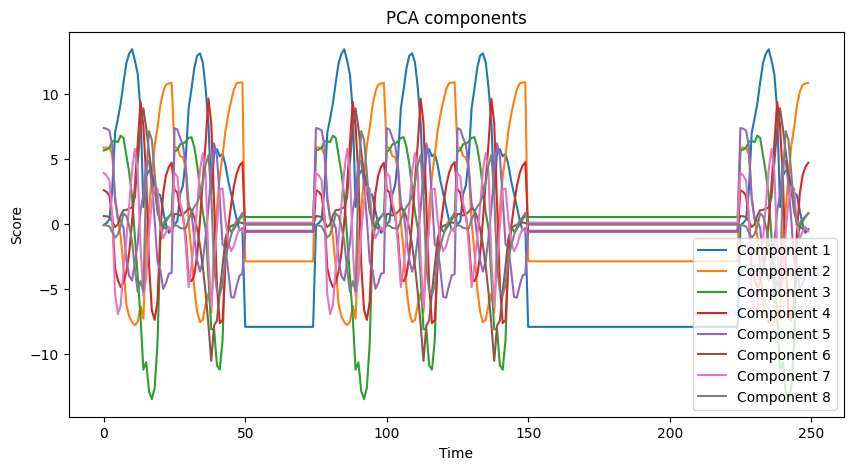

In [13]:
# plot the scores for the first 8 components
plt.figure(figsize=(10, 5))
plt.plot(list_data_pca[0])
plt.plot(list_data_pca[1])
plt.plot(list_data_pca[2])
plt.plot(list_data_pca[3])
plt.plot(list_data_pca[4])
plt.plot(list_data_pca[5])
plt.plot(list_data_pca[6])
plt.plot(list_data_pca[7])
plt.xlabel('Time')
plt.ylabel('Score')
plt.title('PCA components')
plt.legend(['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5', 'Component 6', 'Component 7', 'Component 8'])